In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from general_functions import *
from spherical_flux import *
from sliceplot import *
%load_ext autoreload
%autoreload
%autoreload 2

In [20]:
plt.style.use(['seaborn-poster'])

In [2]:
lr_plume_vals = np.loadtxt('lr_flux_escape_vals_plume_95.txt',delimiter=',',comments='#')
lr_tail_vals = np.loadtxt('lr_flux_escape_vals_tail_95.txt',delimiter=',',comments='#')
hr_plume_vals = np.loadtxt('hr_flux_escape_vals_plume_95.txt',delimiter=',',comments='#')
hr_tail_vals = np.loadtxt('hr_flux_escape_vals_tail_95.txt',delimiter=',',comments='#')


In [11]:
test_plume_vals_flux = np.loadtxt('lr_flux_escape_vals_plume_95.txt',delimiter=',',comments='#',usecols=(2,))

In [13]:
z_planes = np.arange(1.5,3.1,0.1)
x_planes = np.arange(-1.5,-3.1,-0.1)

# Scatter plots of plume & tail, flux and escape:

Text(0,0.5,'Z (MSO)')

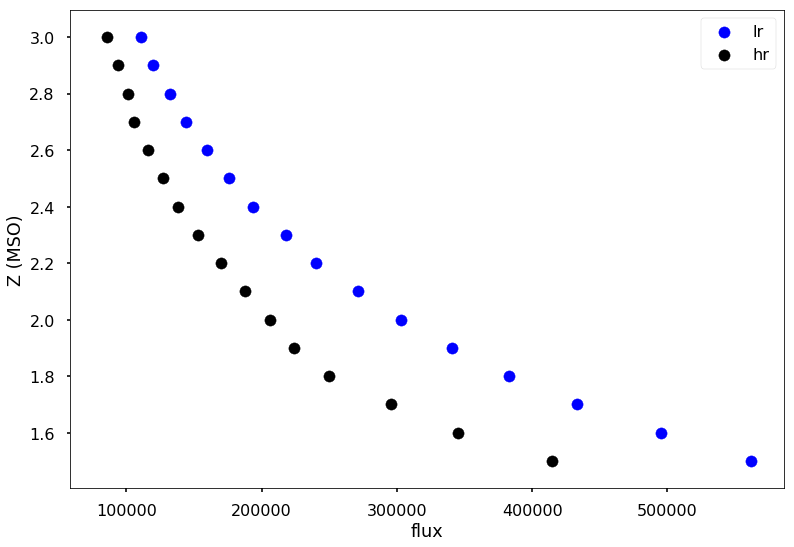

In [27]:
plt.scatter(lr_plume_vals[:,0], z_planes,label='lr',color='b')
plt.scatter(hr_plume_vals[:,0], z_planes,label='hr',color='k')
plt.legend()
plt.xlabel('flux')
plt.ylabel('Z (MSO)')

Text(0.5,0,'X (MSO)')

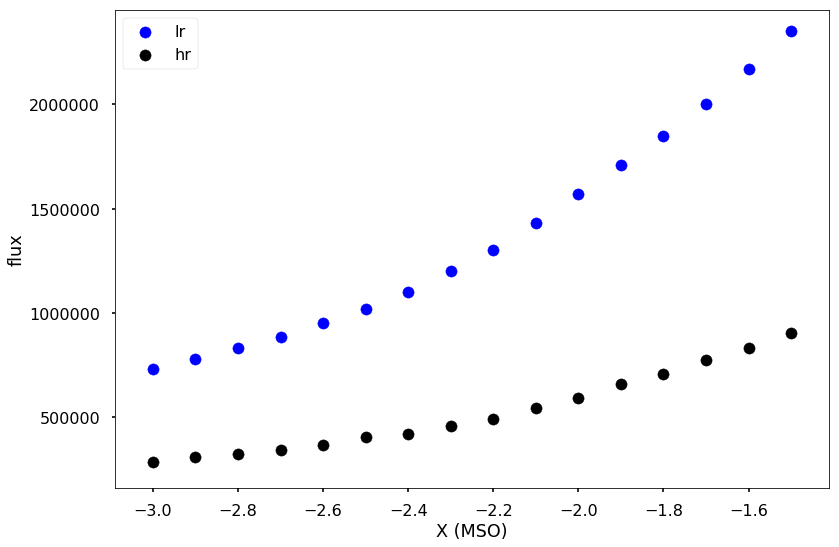

In [34]:
plt.scatter(x_planes,-1*lr_tail_vals[:,0],label='lr',c='b')
plt.scatter(x_planes,-1*hr_tail_vals[:,0],label='hr',c='k')
plt.legend()
plt.ylabel('flux')
plt.xlabel('X (MSO)')

Text(0.5,0,'escape rate')

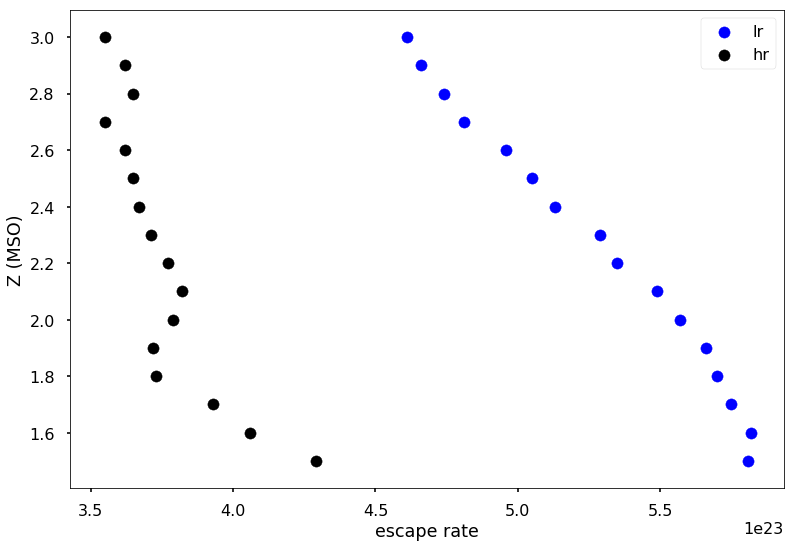

In [141]:
plt.scatter(lr_plume_vals[:,1], z_planes, label='lr',c='b')
plt.scatter(hr_plume_vals[:,1], z_planes, label='hr',c='k')
plt.legend()
plt.ylabel('Z (MSO)')
plt.xlabel('escape rate')

Text(0,0.5,'escape rate')

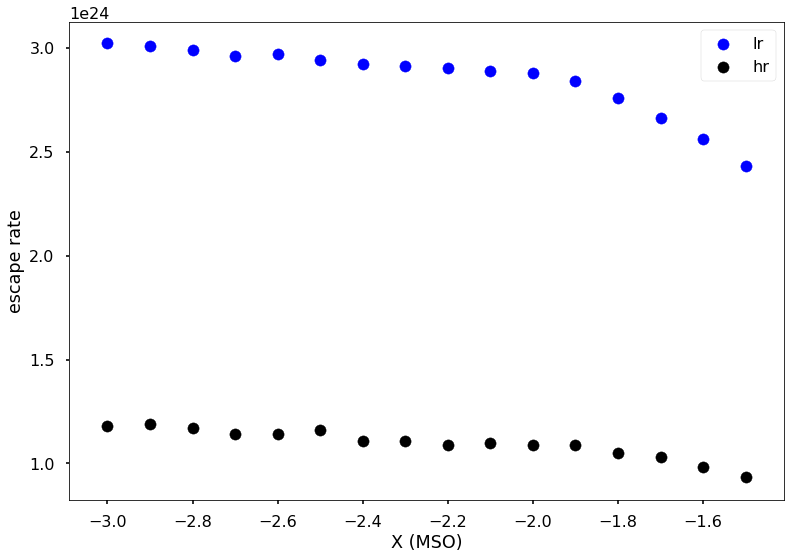

In [110]:
plt.scatter(x_planes, -1*lr_tail_vals[:,1], label='lr',c='b')
plt.scatter(x_planes, -1*hr_tail_vals[:,1], label='hr',c='k')
#plt.axhline(lr_tail_escape_mean)
#plt.axhline(hr_tail_escape_mean)
plt.legend()
plt.xlabel('X (MSO)')
plt.ylabel('escape rate')

# Histograms

In [100]:
lr_plume_escape_mean = np.mean(lr_plume_vals[:,1])
hr_plume_escape_mean = np.mean(hr_plume_vals[:,1])
lr_plume_escape_std = np.std(lr_plume_vals[:,1])
hr_plume_escape_std = np.std(hr_plume_vals[:,1])

lr_tail_escape_mean = -1*np.mean(lr_tail_vals[:,1])
hr_tail_escape_mean = -1*np.mean(hr_tail_vals[:,1])
lr_tail_escape_std = np.std(lr_tail_vals[:,1])
hr_tail_escape_std = np.std(hr_tail_vals[:,1])

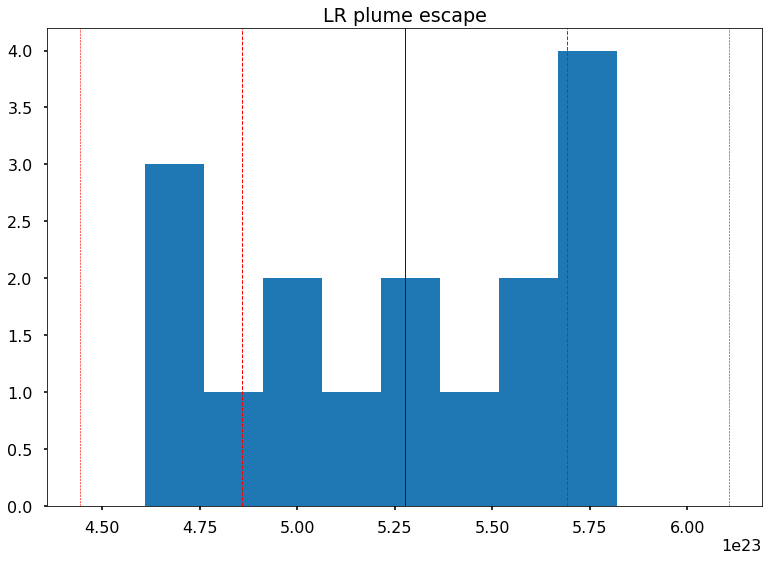

In [101]:
plt.hist(lr_plume_vals[:,1],bins=8)
plt.title('LR plume escape')
plt.axvline(lr_plume_escape_mean,c='b',lw=1)
plt.axvline(lr_plume_escape_mean+lr_plume_escape_std, c='r',lw=1,ls='--')
plt.axvline(lr_plume_escape_mean-lr_plume_escape_std, c='r',lw=1,ls='--')
plt.axvline(lr_plume_escape_mean+(2*lr_plume_escape_std), c='r',lw=0.6,ls='--')
plt.axvline(lr_plume_escape_mean-(2*lr_plume_escape_std), c='r',lw=0.6,ls='--')

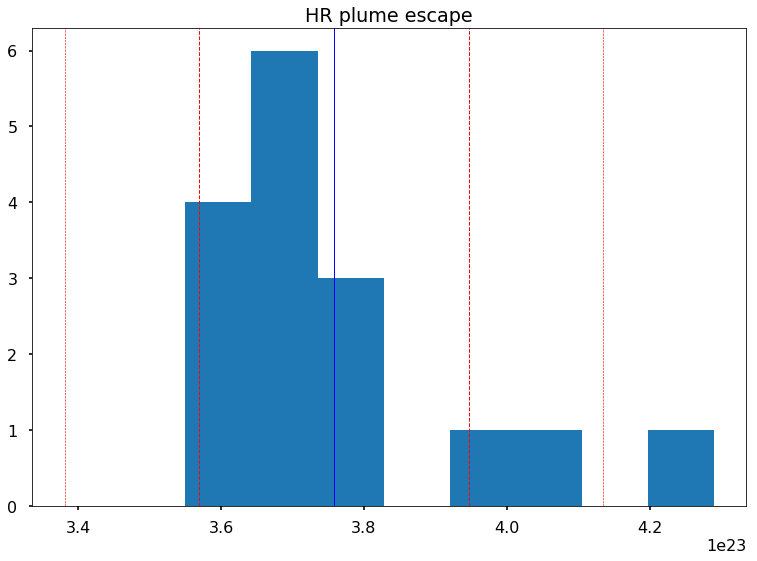

In [102]:
plt.hist(hr_plume_vals[:,1],bins=8)
plt.title('HR plume escape')
plt.axvline(hr_plume_escape_mean,c='b',lw=1)
plt.axvline(hr_plume_escape_mean+hr_plume_escape_std, c='r',lw=1,ls='--')
plt.axvline(hr_plume_escape_mean-hr_plume_escape_std, c='r',lw=1,ls='--')
plt.axvline(hr_plume_escape_mean+(2*hr_plume_escape_std), c='r',lw=0.6,ls='--')
plt.axvline(hr_plume_escape_mean-(2*hr_plume_escape_std), c='r',lw=0.6,ls='--')

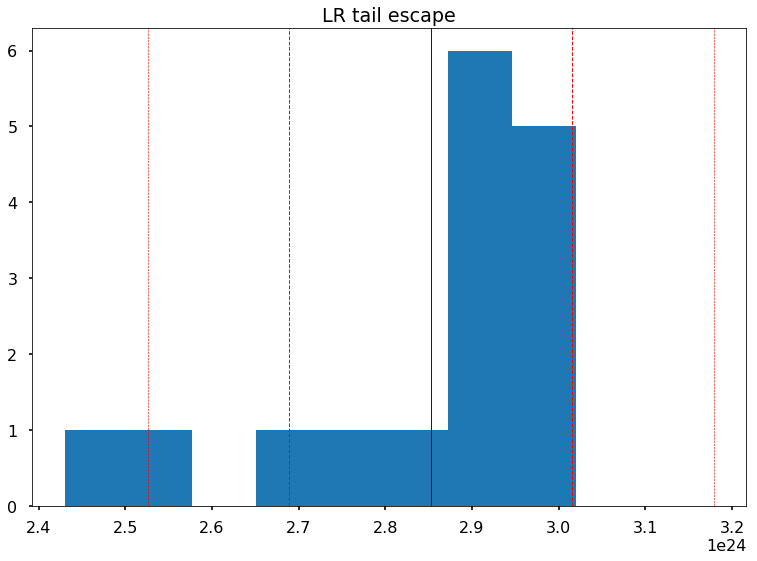

In [134]:
plt.hist(-1*lr_tail_vals[:,1],bins=8)
plt.title('LR tail escape')
plt.axvline(lr_tail_escape_mean,c='b',lw=1)
plt.axvline(lr_tail_escape_mean+lr_tail_escape_std, c='r',lw=1,ls='--')
plt.axvline(lr_tail_escape_mean-lr_tail_escape_std, c='r',lw=1,ls='--')
plt.axvline(lr_tail_escape_mean+(2*lr_tail_escape_std), c='r',lw=0.6,ls='--')
plt.axvline(lr_tail_escape_mean-(2*lr_tail_escape_std), c='r',lw=0.6,ls='--')

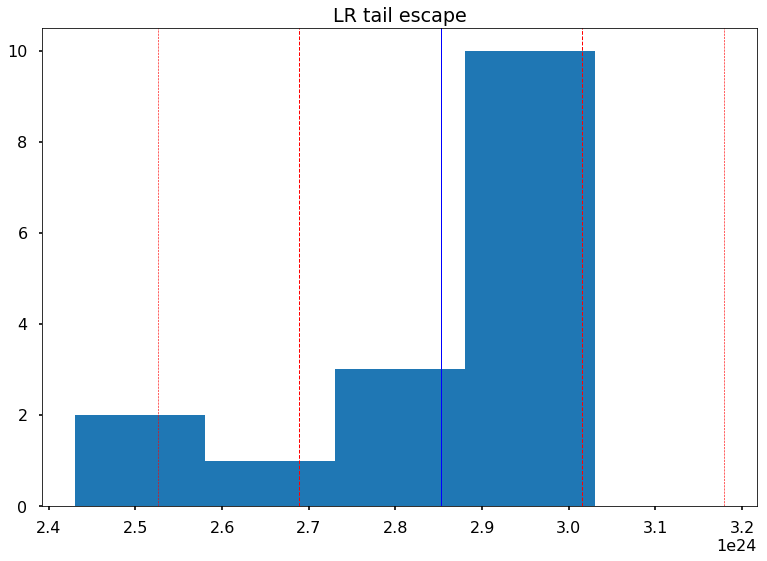

In [138]:
plt.hist(-1*lr_tail_vals[:,1],bins=np.arange(min(-1*lr_tail_vals[:,1]), max(-1*lr_tail_vals[:,1]) + 1.5e23, 1.5e23))
plt.title('LR tail escape')
plt.axvline(lr_tail_escape_mean,c='b',lw=1)
plt.axvline(lr_tail_escape_mean+lr_tail_escape_std, c='r',lw=1,ls='--')
plt.axvline(lr_tail_escape_mean-lr_tail_escape_std, c='r',lw=1,ls='--')
plt.axvline(lr_tail_escape_mean+(2*lr_tail_escape_std), c='r',lw=0.6,ls='--')
plt.axvline(lr_tail_escape_mean-(2*lr_tail_escape_std), c='r',lw=0.6,ls='--')

In [137]:
print np.arange(min(-1*lr_tail_vals[:,1]), max(-1*lr_tail_vals[:,1]) + 1.5e23, 1.5e23)



[2.43e+24 2.58e+24 2.73e+24 2.88e+24 3.03e+24]


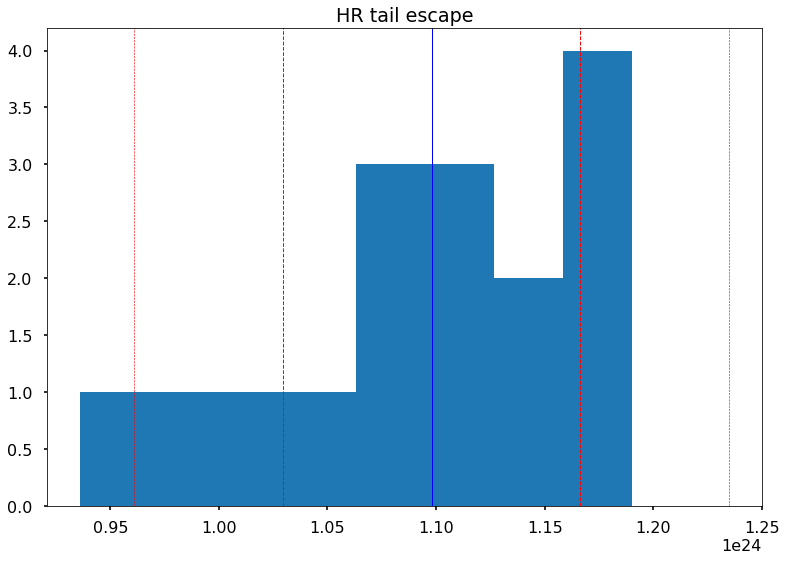

In [107]:
plt.hist(-1*hr_tail_vals[:,1],bins=8)
plt.title('HR tail escape')
plt.axvline(hr_tail_escape_mean,c='b',lw=1)
plt.axvline(hr_tail_escape_mean+hr_tail_escape_std, c='r',lw=1,ls='--')
plt.axvline(hr_tail_escape_mean-hr_tail_escape_std, c='r',lw=1,ls='--')
plt.axvline(hr_tail_escape_mean+(2*hr_tail_escape_std), c='r',lw=0.6,ls='--')
plt.axvline(hr_tail_escape_mean-(2*hr_tail_escape_std), c='r',lw=0.6,ls='--')

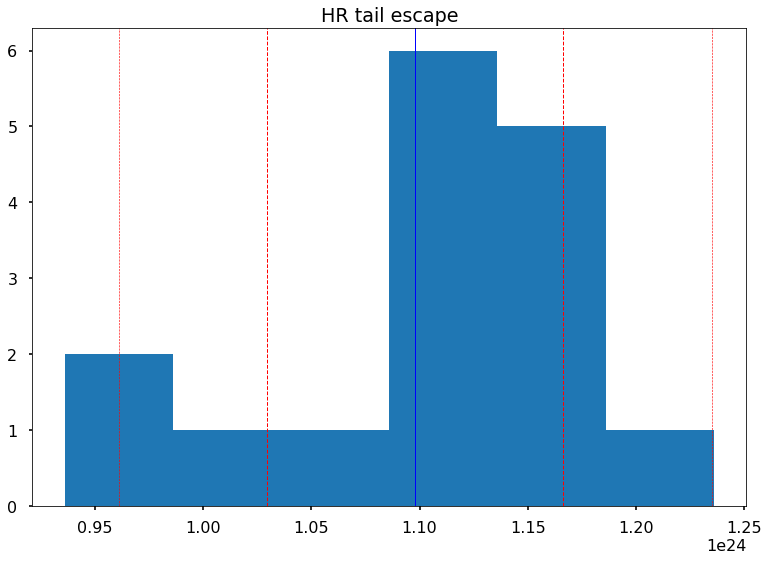

In [128]:
plt.hist(-1*hr_tail_vals[:,1],bins=np.arange(min(-1*hr_tail_vals[:,1]), max(-1*hr_tail_vals[:,1]) + 5e22, 5e22))
plt.title('HR tail escape')
plt.axvline(hr_tail_escape_mean,c='b',lw=1)
plt.axvline(hr_tail_escape_mean+hr_tail_escape_std, c='r',lw=1,ls='--')
plt.axvline(hr_tail_escape_mean-hr_tail_escape_std, c='r',lw=1,ls='--')
plt.axvline(hr_tail_escape_mean+(2*hr_tail_escape_std), c='r',lw=0.6,ls='--')
plt.axvline(hr_tail_escape_mean-(2*hr_tail_escape_std), c='r',lw=0.6,ls='--')

In [127]:
print np.min(-1*hr_tail_vals[:,1])
#print np.max(-1*hr_tail_vals[:,1]) + 1e23
print np.arange(min(-1*hr_tail_vals[:,1]), max(-1*hr_tail_vals[:,1]) + 5e22, 5e22)

9.36e+23
[9.360e+23 9.860e+23 1.036e+24 1.086e+24 1.136e+24 1.186e+24 1.236e+24]
